### How well does simulated data represent real world data?

### Notebobok imports

In [371]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier, plot_importance

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import  DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

import warnings
warnings. filterwarnings('ignore')
sns.set()
%matplotlib inline


### Import dataset

In [422]:
def load_excel_data(dataset_path) -> pd.DataFrame:
    return pd.read_excel(dataset_path, index_col=0)

In [423]:
real_dataset_path = "./Feature_Track.xlsx"
sim_dataset_path = "./Feature_Simulation.xlsx"

In [424]:
real_track_data = load_excel_data(real_dataset_path)
sim_track_data = load_excel_data(sim_dataset_path)

In [425]:
# Check first few rows of real track  dataset
real_track_data.head()

,subject,lap,start_time,straight,roundabout_entry,roundabout_exit,zebra_crossing,left_turn,u_turn,bypass_dummy,...,LowerAlphaFrontal,LowerAlphaParietal,UpperAlphaFrontal,UpperAlphaParietal,BetaFrontal,BetaParietal,LowerBetaFrontal,LowerBetaParietal,UpperBetaFrontal,UpperBetaParietal
0,0AC2A4,1,7,1,1,0,0,1,0,0,...,0.13222,0.08812,0.13469,0.08590,0.05499,0.04078,0.08419,0.06275,0.03722,0.02711
1,0AC2A4,1,27,1,0,1,0,1,0,0,...,0.13639,0.08118,0.12483,0.07588,0.04060,0.02869,0.05951,0.04759,0.02963,0.01753
2,0AC2A4,1,33,1,0,0,1,1,0,0,...,0.19671,0.11480,0.10121,0.09079,0.04339,0.02727,0.06250,0.04305,0.03296,0.01751
3,0AC2A4,1,43,1,1,0,0,0,0,0,...,0.20826,0.12873,0.11832,0.11087,0.04872,0.02917,0.06894,0.04766,0.03627,0.01744
4,0AC2A4,1,58,1,1,0,0,0,0,0,...,0.21193,0.14454,0.13428,0.13604,0.04173,0.02743,0.05937,0.04344,0.03132,0.01762


In [426]:
# Simulated track data
sim_track_data.head()

,subject,lap,start_time,straight,roundabout_entry,roundabout_exit,zebra_crossing,left_turn,u_turn,bypass_dummy,...,LowerAlphaFrontal,LowerAlphaParietal,UpperAlphaFrontal,UpperAlphaParietal,BetaFrontal,BetaParietal,LowerBetaFrontal,LowerBetaParietal,UpperBetaFrontal,UpperBetaParietal
0,0AC2A4,1,13,1,0,0,1,0,0,0,...,0.12420,0.07737,0.12307,0.07681,0.05046,0.03492,0.07430,0.05289,0.03606,0.02393
1,0AC2A4,1,32,0,1,0,1,0,0,0,...,0.20402,0.10296,0.14606,0.10325,0.03636,0.02433,0.05822,0.04136,0.02535,0.01391
2,0AC2A4,1,36,0,0,1,1,0,0,0,...,0.20329,0.12355,0.09483,0.08173,0.04524,0.02847,0.06055,0.04321,0.03586,0.01923
3,0AC2A4,1,42,1,0,0,0,0,0,0,...,0.20325,0.12153,0.11255,0.10920,0.04928,0.02923,0.07192,0.04653,0.03536,0.01832
4,0AC2A4,1,52,1,0,0,0,0,1,0,...,0.19645,0.13454,0.13270,0.13759,0.04501,0.02943,0.06175,0.04715,0.03511,0.01838


In [427]:
# Check for null values
real_track_data.isnull().sum()

subject                0
lap                    0
start_time             0
straight               0
roundabout_entry       0
                    ... 
BetaParietal         247
LowerBetaFrontal     247
LowerBetaParietal    247
UpperBetaFrontal     247
UpperBetaParietal    247
Length: 88, dtype: int64

In [428]:
sim_track_data.isnull().sum()

subject                0
lap                    0
start_time             0
straight               0
roundabout_entry       0
                    ... 
BetaParietal         192
LowerBetaFrontal     192
LowerBetaParietal    192
UpperBetaFrontal     192
UpperBetaParietal    192
Length: 88, dtype: int64

In [429]:
print(f"Shape of real track data: {real_track_data.shape}")
print(f"Shape of real track data: {sim_track_data.shape}")

Shape of real track data: (1056, 88)
Shape of real track data: (1287, 88)


In [430]:
for col in real_track_data.columns:
    print(col, real_track_data[col].isnull().sum())

subject 0
lap 0
start_time 0
straight 0
roundabout_entry 0
roundabout_exit 0
zebra_crossing 0
left_turn 0
u_turn 0
bypass_dummy 0
car 0
pedestrian 0
traffic_light 0
narrow_road 0
dummy 0
bend 0
habituation 0
traffic 0
hurry 0
frustration 0
surprise 0
risk_outcome 0
risk_source_env 0
risk_source_other_usr 0
risk_source_driver 0
risk_source_crash 0
risk_evaluation 0
violation_no 0
violation_roadside_invasion 0
violation_give_the_way 0
violation_road_signs 0
violation_heavy_braking 0
violation_roadside_exit 0
violation_slowdown 0
emotion_na 0
emotion_neutral 0
emotion_surprise 0
emotion_anger 0
emotion_boredom 0
emotion_fear 0
emotion_fun 0
gaze_na 0
gaze_complete_expl 0
gaze_partial_expl 0
gaze_poor_expl 0
distraction_na 0
distraction_no 0
distraction_reduced_attention 0
distraction_speaking 0
max_speed 44
avg_speed 44
std_speed 44
yaw 0
yaw_rate 0
roll 0
roll_rate 0
pitch 0
pitch_rate 0
lat_acce 0
long_acce 0
vert_acce 0
avg_acce_pedal_pos 0
std_acce_pedal_pos 0
avg_steer_angle 0
std_st

### Data Preprocessing and Feature Engineering
- Fill null values
- Select relevant features

In [431]:
def fill_null_vals(dataset, groupby_col="subject") -> pd.DataFrame:
    for column in dataset.columns:
        # Skip the column used for grouping
        if column == groupby_col:
            continue
        # Apply group-specific mean for each column with missing values
        dataset[column] = dataset.groupby(groupby_col)[column].transform(lambda x: x.fillna(x.mean()))
    return dataset

In [432]:
real_track_data_nulls_filled = fill_null_vals(real_track_data, "subject")

In [433]:
for col in real_track_data_nulls_filled.columns:
    print(col, real_track_data_nulls_filled[col].isnull().sum())

subject 0
lap 0
start_time 0
straight 0
roundabout_entry 0
roundabout_exit 0
zebra_crossing 0
left_turn 0
u_turn 0
bypass_dummy 0
car 0
pedestrian 0
traffic_light 0
narrow_road 0
dummy 0
bend 0
habituation 0
traffic 0
hurry 0
frustration 0
surprise 0
risk_outcome 0
risk_source_env 0
risk_source_other_usr 0
risk_source_driver 0
risk_source_crash 0
risk_evaluation 0
violation_no 0
violation_roadside_invasion 0
violation_give_the_way 0
violation_road_signs 0
violation_heavy_braking 0
violation_roadside_exit 0
violation_slowdown 0
emotion_na 0
emotion_neutral 0
emotion_surprise 0
emotion_anger 0
emotion_boredom 0
emotion_fear 0
emotion_fun 0
gaze_na 0
gaze_complete_expl 0
gaze_partial_expl 0
gaze_poor_expl 0
distraction_na 0
distraction_no 0
distraction_reduced_attention 0
distraction_speaking 0
max_speed 0
avg_speed 0
std_speed 0
yaw 0
yaw_rate 0
roll 0
roll_rate 0
pitch 0
pitch_rate 0
lat_acce 0
long_acce 0
vert_acce 0
avg_acce_pedal_pos 0
std_acce_pedal_pos 0
avg_steer_angle 0
std_steer

In [434]:
sim_track_data_nulls_filled = fill_null_vals(sim_track_data)

for col in sim_track_data_nulls_filled.columns:
    print(col, sim_track_data_nulls_filled[col].isnull().sum())

subject 0
lap 0
start_time 0
straight 0
roundabout_entry 0
roundabout_exit 0
zebra_crossing 0
left_turn 0
u_turn 0
bypass_dummy 0
car 0
pedestrian 0
traffic_light 0
narrow_road 0
dummy 0
bend 0
habituation 0
traffic 0
hurry 0
frustration 0
surprise 0
risk_outcome 0
risk_source_env 0
risk_source_other_usr 0
risk_source_driver 0
risk_source_crash 0
risk_evaluation 0
violation_no 0
violation_roadside_invasion 0
violation_give_the_way 0
violation_road_signs 0
violation_heavy_braking 0
violation_roadside_exit 0
violation_slowdown 0
emotion_na 0
emotion_neutral 0
emotion_surprise 0
emotion_anger 0
emotion_boredom 0
emotion_fear 0
emotion_fun 0
gaze_na 0
gaze_complete_expl 0
gaze_partial_expl 0
gaze_poor_expl 0
distraction_na 0
distraction_no 0
distraction_reduced_attention 0
distraction_speaking 0
max_speed 0
avg_speed 0
std_speed 0
yaw 0
yaw_rate 0
roll 0
roll_rate 0
pitch 0
pitch_rate 0
lat_acce 0
long_acce 0
vert_acce 0
avg_acce_pedal_pos 0
std_acce_pedal_pos 0
avg_steer_angle 0
std_steer

In [435]:
group_by_subject = real_track_data.groupby('subject')
group_by_subject.size()

subject
0AC2A4    55
13790E    55
144282    66
2268A5    77
492488    77
6B11F5    66
8924EA    77
92710E    55
B410A4    66
B570F8    77
C1CE6B    77
D4F190    44
DCF930    55
ED731A    77
EDEB96    66
F9D528    66
dtype: int64

In [436]:
real_track_data.subject.unique()

array(['0AC2A4', '13790E', '144282', '2268A5', '6B11F5', '92710E',
       'B410A4', 'B570F8', 'C1CE6B', 'D4F190', 'DCF930', 'ED731A',
       'EDEB96', 'F9D528', '492488', '8924EA'], dtype=object)

In [437]:
group_has_null = real_track_data_nulls_filled.groupby('subject').apply(lambda x: x.isnull().any(axis=1).any())
# Display groups that have null values
groups_with_nulls = group_has_null[group_has_null].index.tolist()
print("Groups with null values:", groups_with_nulls)

Groups with null values: ['B570F8']


#### As can be seen, there is one subject in the real track dataset which has null values for the neurophysiological features
- We need to drop samples for this subject

In [438]:
# drop all rows with null values
real_track_data_nulls_filled = real_data_nulls_filled.dropna()
real_data_nulls_filled.shape

(979, 88)

In [439]:
# drop all rows with null values
sim_data_nulls_filled = sim_data_nulls_filled.dropna()
sim_data_nulls_filled.shape

(1287, 88)

In [440]:
group_has_null = sim_data_nulls_filled.groupby('subject').apply(lambda x: x.isnull().any(axis=1).any())
# Display groups that have null values
groups_with_nulls = group_has_null[group_has_null].index.tolist()
print("Groups with null values:", groups_with_nulls)

Groups with null values: []


#### Feature selection

In [441]:
real_track_data_nulls_filled_copy = real_track_data_nulls_filled.drop(['subject'], axis=1)

In [442]:
# Calculate the correlation matrix
corr_matrix = real_track_data_nulls_filled_copy.corr()

# Initialize a list to store pairs of highly correlated features
highly_correlated_features = []

# Iterate over the correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)): # Avoid repeating pairs and self-correlation
        if np.abs(corr_matrix.iloc[i, j]) >= 0.9:
            # If absolute correlation is 0.9 or more, add the pair to the list
            highly_correlated_features.append((corr_matrix.columns[i], corr_matrix.columns[j]))

In [443]:
highly_correlated_features

[('risk_source_driver', 'risk_evaluation'),
 ('risk_source_driver', 'violation_no'),
 ('risk_evaluation', 'violation_no'),
 ('emotion_neutral', 'emotion_fun'),
 ('distraction_no', 'distraction_speaking'),
 ('yaw', 'lat_acce'),
 ('yaw', 'avg_steer_angle'),
 ('gsr_phasic', 'gsr_peaks'),
 ('ThetaFrontal', 'LowerAlphaFrontal'),
 ('AlphaFrontal', 'LowerAlphaFrontal'),
 ('AlphaFrontal', 'UpperAlphaFrontal'),
 ('AlphaParietal', 'LowerAlphaParietal'),
 ('AlphaParietal', 'UpperAlphaParietal'),
 ('BetaFrontal', 'LowerBetaFrontal'),
 ('BetaFrontal', 'UpperBetaFrontal'),
 ('BetaParietal', 'LowerBetaParietal'),
 ('BetaParietal', 'UpperBetaParietal'),
 ('LowerBetaFrontal', 'UpperBetaFrontal')]

In [454]:
# Features to train model on
selected_cols = [
    #'lap',
    #'start_time',
    'straight',
    'roundabout_entry',
    'roundabout_exit',
    'zebra_crossing',
    'left_turn',
    'u_turn',
    'bypass_dummy',
    'car',
    'pedestrian',
    'traffic_light',
    'narrow_road',
    'dummy',
    'bend',
    'habituation',
    'traffic',
    #'hurry',
    'frustration',
    #'surprise',
    'risk_outcome',
    'risk_source_env',
    'risk_source_other_usr',
    'risk_source_driver',
    'risk_source_crash',
    'violation_roadside_invasion',
    'violation_give_the_way',
    'violation_road_signs',
    'violation_heavy_braking',
    'violation_roadside_exit',
    'violation_slowdown',
    'emotion_na',
    'emotion_neutral',
    'emotion_surprise',
    'emotion_anger',
    'emotion_boredom',
    'emotion_fear',
    'gaze_na',
    'gaze_complete_expl',
    'gaze_partial_expl',
    'gaze_poor_expl',
    'distraction_na',
    'distraction_no',
    'distraction_reduced_attention',
    'max_speed',
    'avg_speed',
    'std_speed',
    'yaw',
    'yaw_rate',
    'roll',
    'roll_rate',
    'pitch',
    'pitch_rate',
    'long_acce',
    'vert_acce',
    'avg_acce_pedal_pos',
    'std_acce_pedal_pos',
    'std_steer_angle',
    'hr',
    'hrv_lf',
    'hrv_hf',
    'hrv_lfhf_ratio',
    'gsr_tonic',
    'gsr_phasic',
    'EBRmean',
    'BDmean',
    'ThetaFrontal',
    'ThetaParietal',
    'AlphaFrontal',
    'AlphaParietal',
    'BetaFrontal',
    'BetaParietal',
]

In [455]:
r_data = real_data_nulls_filled[selected_cols]
r_data.shape

(979, 68)

In [456]:
X = r_data.drop(['frustration'], axis=1)
y = r_data['frustration']

In [457]:
target = y.map({1: 1, 2: 0})

### Train-Test-Split

In [458]:
X_train, X_test, y_train, y_test = train_test_split(X, target, stratify=target, test_size=0.2, random_state=42)

### Modelling

In [459]:
xgb_clf = XGBClassifier(eval_metric='logloss')

In [460]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(xgb_clf, X_train, y_train, cv=5)

In [461]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [462]:
# Print the accuracy for each fold
print("Accuracy scores for each fold:")
print(cv_scores)

Accuracy scores for each fold:
[0.92993631 0.92356688 0.93630573 0.93589744 0.96153846]


In [463]:
feature_importances = xgb_clf.feature_importances_
feature_importances

array([0.04766164, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00075027, 0.        , 0.03614046,
       0.        , 0.        , 0.        , 0.0148737 , 0.22137982,
       0.0042936 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00440622, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00617463,
       0.01438417, 0.01353789, 0.01209367, 0.01508176, 0.01406299,
       0.01747365, 0.04828705, 0.00873407, 0.02830798, 0.01732875,
       0.04452563, 0.06237828, 0.00930042, 0.04310877, 0.0025696 ,
       0.00203873, 0.00346511, 0.01545314, 0.01674925, 0.0183356 ,
       0.0107562 , 0.01040529, 0.03436508, 0.02643615, 0.13620211,
       0.0222297 , 0.01670857], dtype=float32)

<Figure size 1000x500 with 0 Axes>

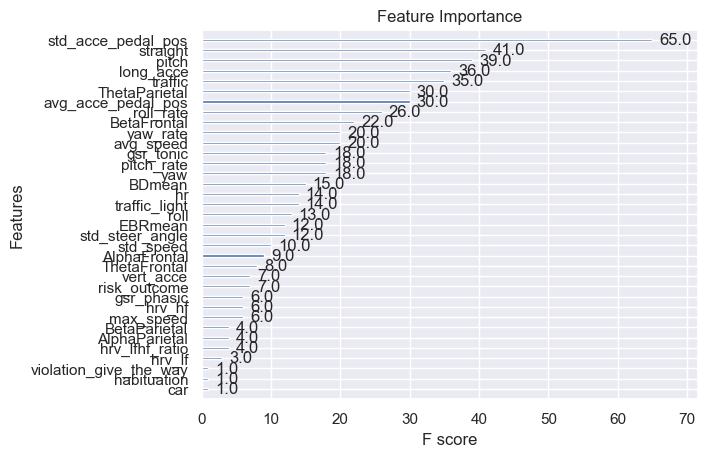

In [464]:
# Plot feature importances
plt.figure(figsize=(10, 5))
plot_importance(xgb_clf, importance_type='weight', title='Feature Importance')
plt.show()

In [465]:
preds = xgb_clf.predict(X_test)

In [466]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       163
           1       0.82      0.85      0.84        33

    accuracy                           0.94       196
   macro avg       0.90      0.91      0.90       196
weighted avg       0.94      0.94      0.94       196



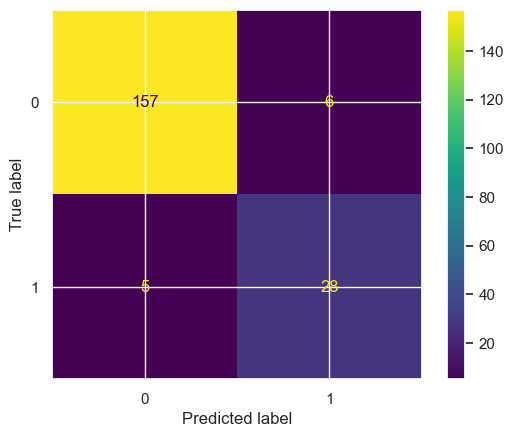

In [467]:
cm =confusion_matrix(y_test, preds, labels=xgb_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_clf.classes_)
disp.plot()
plt.show()

### Train a set of different ML models and compare how they perform on the real dataset

In [468]:
models = {
    'LogisticRegression':LogisticRegression(),
    'BaggingClassifier': BaggingClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'LinearSVC':LinearSVC(),
    'SGDClassifier':SGDClassifier(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    "SVC":SVC(),
    "GaussianProcessClassifier": GaussianProcessClassifier(),
    "MLPClassifier": MLPClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "GaussianNB":GaussianNB(),
    "QuadraticDiscriminantAnalysis":QuadraticDiscriminantAnalysis(),
    "XGBOOST": XGBClassifier()
}

In [469]:
real_track_dataset_performance = pd.DataFrame(columns=["Train Accuracy","Test Accuracy"], index=list(models.keys()))

In [470]:
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate evaluation metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    #Save Test and Training Accuracies
    real_track_dataset_performance.loc[name, :] = [train_accuracy,test_accuracy]

In [471]:
real_track_dataset_performance.sort_values(by=['Test Accuracy'], ascending=False)

,Train Accuracy,Test Accuracy
XGBOOST,1.0,0.943878
GradientBoostingClassifier,1.0,0.938776
AdaBoostClassifier,1.0,0.938776
RandomForestClassifier,1.0,0.923469
MLPClassifier,0.954023,0.923469
LogisticRegression,0.916986,0.903061
BaggingClassifier,0.99106,0.897959
DecisionTreeClassifier,1.0,0.872449
LinearSVC,0.90166,0.872449
QuadraticDiscriminantAnalysis,0.909323,0.857143


In [472]:
### Modelling on the simulated dataset

In [477]:
s_data = sim_track_data_nulls_filled[selected_cols]
s_data.shape

(1287, 68)

In [478]:
S_data = s_data.drop(['frustration'], axis=1)
S_y  = s_data["frustration"]
s_tartget = S_y.map({1:1, 2:0})

In [479]:
s_tartget.value_counts()

frustration
0    1084
1     203
Name: count, dtype: int64

In [480]:
S_train, S_test, y_train_s, y_test_s = train_test_split(S_data, s_tartget, test_size=0.2, random_state=42)

In [481]:
xgb_clf_s = XGBClassifier(eval_metric='logloss')

In [482]:
xgb_clf_s.fit(S_train, y_train_s)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [483]:
preds_s = xgb_clf_s.predict(S_test)

In [485]:
print(classification_report(y_test_s, preds_s))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       217
           1       0.94      0.76      0.84        41

    accuracy                           0.95       258
   macro avg       0.95      0.87      0.91       258
weighted avg       0.95      0.95      0.95       258



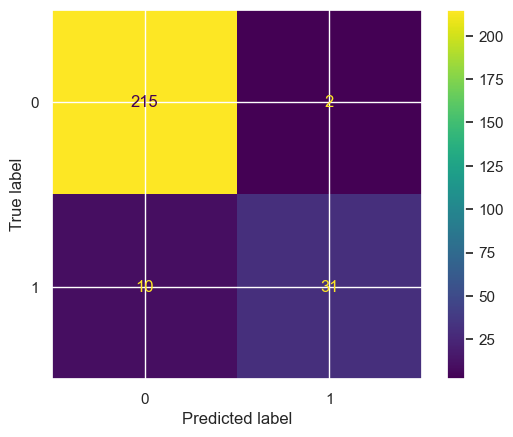

In [486]:
cm =confusion_matrix(y_test_s, preds_s, labels=xgb_clf_s.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_clf_s.classes_)
disp.plot()
plt.show()

In [417]:
sim_track_data_performance = pd.DataFrame(columns=["Train Accuracy","Test Accuracy"], index=list(models.keys()))

In [418]:
for name, model in models.items():
    # Train the model
    model.fit(S_train, y_train_s)

    # Make predictions on the test set
    y_train_pred_s = model.predict(S_train)
    y_test_pred_s = model.predict(S_test)

    # Calculate evaluation metrics
    test_accuracy = accuracy_score(y_test_s, y_test_pred_s)
    train_accuracy = accuracy_score(y_train_s, y_train_pred_s)

    #Save Test and Training Accuracies
    sim_track_data_performance.loc[name, :] = [train_accuracy,test_accuracy]

ValueError: Input y contains NaN.

In [330]:
sim_track_data_performance.sort_values(by=['Test Accuracy'], ascending=False)

,Train Accuracy,Test Accuracy
XGBOOST,1.0,0.953488
RandomForestClassifier,1.0,0.949612
GradientBoostingClassifier,0.993197,0.949612
BaggingClassifier,0.993197,0.945736
MLPClassifier,0.941691,0.94186
AdaBoostClassifier,0.972789,0.94186
LogisticRegression,0.912536,0.937984
DecisionTreeClassifier,1.0,0.937984
QuadraticDiscriminantAnalysis,0.840622,0.848837
SVC,0.842566,0.841085


In [331]:
xgb_clf_s = XGBClassifier(eval_metric='logloss')

In [332]:
xgb_clf_s.fit(S_train, y_train_s)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

<Figure size 1000x500 with 0 Axes>

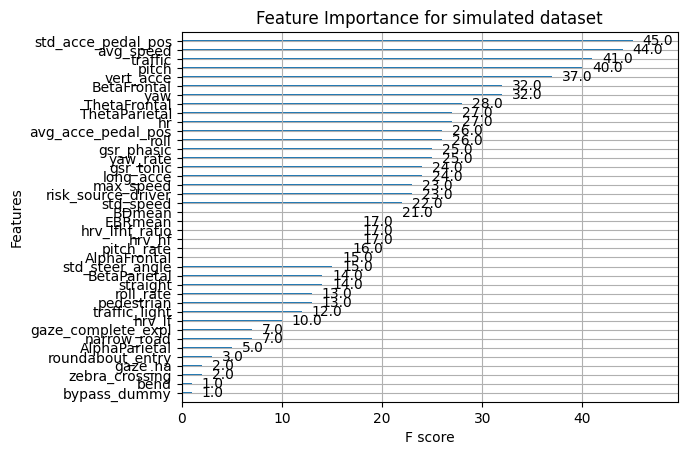

In [336]:
# Plot feature importances
plt.figure(figsize=(10, 5))
plot_importance(xgb_clf_s, importance_type='weight', title='Feature Importance for simulated dataset')
plt.show()

<Figure size 1000x500 with 0 Axes>

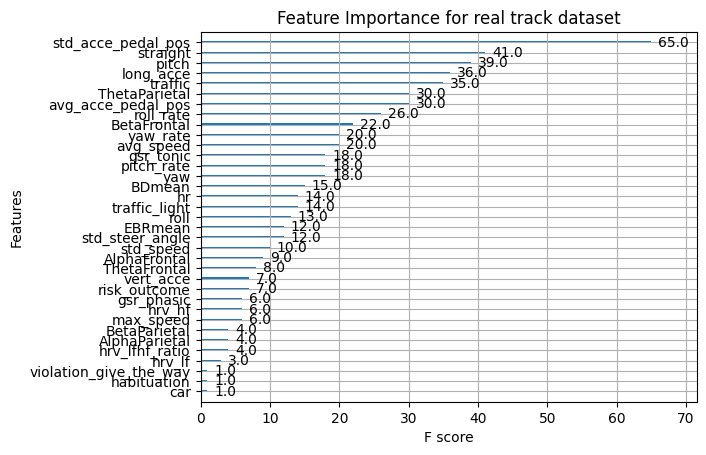

In [335]:
# Plot feature importances
plt.figure(figsize=(10, 5))
plot_importance(xgb_clf, importance_type='weight', title='Feature Importance for real track dataset')
plt.show()

### Retraining without the Neurophysiological featurees

In [350]:
# Features to train model on
sld_cols = [
    #'lap',
    #'start_time',
    'straight',
    'roundabout_entry',
    'roundabout_exit',
    'zebra_crossing',
    'left_turn',
    'u_turn',
    'bypass_dummy',
    'car',
    'pedestrian',
    'traffic_light',
    'narrow_road',
    'dummy',
    'bend',
    'habituation',
    'traffic',
    #'hurry',
    'frustration',
    #'surprise',
    'risk_outcome',
    'risk_source_env',
    'risk_source_other_usr',
    'risk_source_driver',
    'risk_source_crash',
    'violation_roadside_invasion',
    'violation_give_the_way',
    'violation_road_signs',
    'violation_heavy_braking',
    'violation_roadside_exit',
    'violation_slowdown',
    'emotion_na',
    'emotion_neutral',
    'emotion_surprise',
    'emotion_anger',
    'emotion_boredom',
    'emotion_fear',
    'gaze_na',
    'gaze_complete_expl',
    'gaze_partial_expl',
    'gaze_poor_expl',
    'distraction_na',
    'distraction_no',
    'distraction_reduced_attention',
    'max_speed',
    'avg_speed',
    'std_speed',
    'yaw',
    'yaw_rate',
    'roll',
    'roll_rate',
    'pitch',
    'pitch_rate',
    'long_acce',
    'vert_acce',
    'avg_acce_pedal_pos',
    'std_acce_pedal_pos',
    'std_steer_angle'
]

In [351]:
r_data2 = real_data_nulls_filled[sld_cols]

In [352]:
X2 = r_data2.drop(['frustration'], axis=1)

In [353]:
X_train2, X_test2, y_train, y_test = train_test_split(X2, target, stratify=target, test_size=0.2, random_state=42)

In [354]:
xgb_clf2 = XGBClassifier(eval_metric='logloss')
xgb_clf2.fit(X_train2, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [355]:
preds2 = xgb_clf2.predict(X_test2)

In [356]:
print(classification_report(y_test, preds2))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       163
           1       0.90      0.85      0.88        33

    accuracy                           0.96       196
   macro avg       0.94      0.92      0.93       196
weighted avg       0.96      0.96      0.96       196



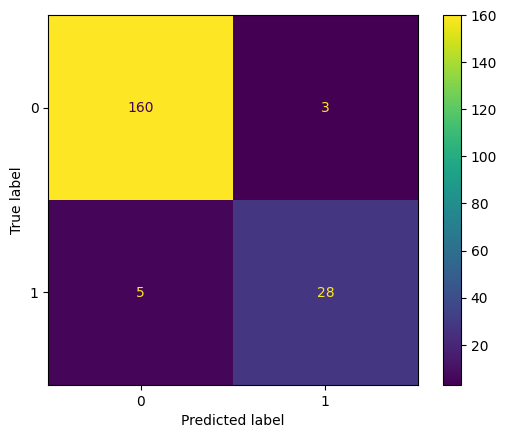

In [357]:
cm =confusion_matrix(y_test, preds2, labels=xgb_clf2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_clf2.classes_)
disp.plot()
plt.show()

In [359]:
s_data3 = sim_data_nulls_filled[sld_cols]

In [360]:
X3 = s_data3.drop(['frustration'], axis=1)

In [363]:
X_train3, X_test3, y_train, y_test = train_test_split(X3, s_tartget, stratify=s_tartget, test_size=0.2, random_state=42)

In [364]:
xgb_clf3 = XGBClassifier(eval_metric='logloss')
xgb_clf3.fit(X_train3, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [365]:
preds3 = xgb_clf3.predict(X_test3)

In [366]:
print(classification_report(y_test, preds3))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       217
           1       0.81      0.61      0.69        41

    accuracy                           0.91       258
   macro avg       0.87      0.79      0.82       258
weighted avg       0.91      0.91      0.91       258



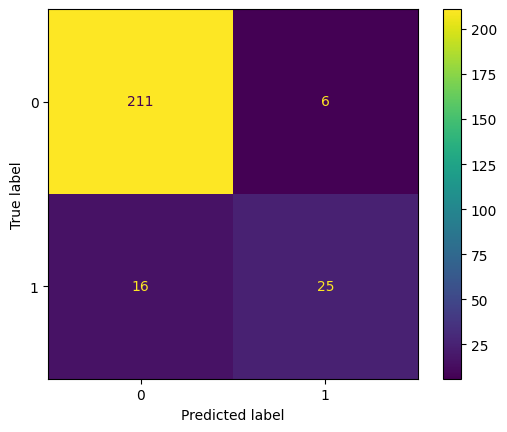

In [367]:
cm =confusion_matrix(y_test, preds3, labels=xgb_clf3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_clf3.classes_)
disp.plot()
plt.show()